In [1]:
from utils.epg import *

In [2]:
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))

In [3]:
from scipy.optimize import least_squares
from lmfit import Parameters, fit_report, minimize

In [4]:
#whenever want to reload libraries
import importlib
import utils
importlib.reload(utils.epg)
from utils.epg import *

In [5]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [6]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


## 1. Proton Momentum Correction from MC

In [ ]:
# #dvcs from simulation, vz correct, vxvy (0.05, 0.1), rec
# fname = "~/Dropbox (MIT)/data/MC/nonradVxyzCorrInbREC.root"
# epg = epgFromROOT(fname, rec=True)
# dvpi0 = epg.getDVpi0(correction=False)
# dvcs = epg.getDVCS(correction=False, sub2g=False)
# dvcsMCVxyzCorrInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

In [53]:
#pi0 from Andrey, inb, rec
fname = "~/Dropbox (MIT)/data/MC/dnp/pi0DNPInbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=False)
dvcs = epg.getDVCS(correction=False, sub2g=False)
pi0MCdnpInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_ep": epg.df_ep, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC":epg.df_MC}

In [ ]:
# #dvcs from simulation, vz correct, vxvy (0.05, 0.1), rec
# fname = "~/Dropbox (MIT)/data/MC/nonradVxyzCorrOutbREC.root"
# epg = epgFromROOT(fname, rec=True)
# dvpi0 = epg.getDVpi0(correction=False)
# dvcs = epg.getDVCS(correction=False, sub2g=False)
# dvcsMCVxyzCorrOutb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

In [ ]:
# #pi0 from Andrey, inb, rec
# fname = "~/Dropbox (MIT)/data/MC/dnp/pi0DNPOutbREC.root"
# epg = epgFromROOT(fname, rec=True)
# dvpi0 = epg.getDVpi0(correction=False)
# dvcs = epg.getDVCS(correction=False, sub2g=False)
# pi0MCdnpOutb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_ep": epg.df_ep, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC":epg.df_MC}

In [ ]:
# dvcs = dvcsMCVxyzCorrInb["dvcs"]
# df_MC = dvcsMCVxyzCorrInb["df_MC"]
# dvcs = pd.merge(dvcs, df_MC, how="inner", on="event")
# binx = 101#np.linspace(30,45,101)
# biny = 101
# dvcs["Pp"] = mag([dvcs["Ppx"], dvcs["Ppy"], dvcs["Ppz"]])
# dvcs["MCPp"] = mag([dvcs["MCPpx"], dvcs["MCPpy"], dvcs["MCPpz"]])
# dvcs01 = dvcs[dvcs["Ptheta"]<27]
# dvcs02 = dvcs[dvcs["Ptheta"]>=27]

# plt.hist2d(dvcs["MCPp"], dvcs["Pp"], cmin = 1, cmap=cmap, bins =[binx,biny])
# plt.show()

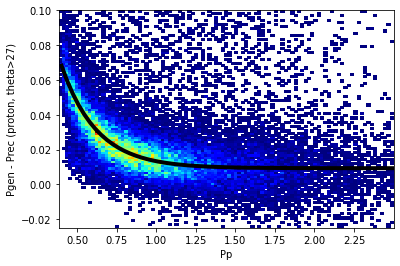

In [74]:
dvcs = pi0MCdnpInb["dvcs"]
dvpi0 = pi0MCdnpInb["dvpi0"]
df_MC = pi0MCdnpInb["df_MC"]
gam1 = df_MC[df_MC.index%2==0]
gam1 = gam1.reset_index(drop=True)
gam2 = df_MC[df_MC.index%2==1]
gam2 = gam2.reset_index(drop=True)
gam1.loc[:,"MCGpx2"] = gam2.loc[:,"MCGpx"]
gam1.loc[:,"MCGpy2"] = gam2.loc[:,"MCGpy"]
gam1.loc[:,"MCGpz2"] = gam2.loc[:,"MCGpz"]
gam1.loc[:,"MCGe2"] = gam2.loc[:,"MCGe"]
df_MC = gam1
dvcs = pd.merge(dvcs, df_MC, how="inner", on="event")
dvpi0 = pd.merge(dvpi0, df_MC, how="inner", on="event")
dvpi0copy = copy(dvpi0)
dvpi0copy.loc[:, "MCGe"] = np.where(dvpi0["MCGe"]>dvpi0["MCGe2"], dvpi0.loc[:, "MCGe"], dvpi0.loc[:, "MCGe2"])
dvpi0copy.loc[:, "MCGe2"] = np.where(dvpi0["MCGe"]>dvpi0["MCGe2"], dvpi0.loc[:, "MCGe2"], dvpi0.loc[:, "MCGe"])
dvpi0 = dvpi0copy
dvpi0["Pp"] = mag([dvpi0["Ppx"], dvpi0["Ppy"], dvpi0["Ppz"]])
dvpi0["MCPp"] = mag([dvpi0["MCPpx"], dvpi0["MCPpy"], dvpi0["MCPpz"]])
dvpi01 = dvpi0[dvpi0["Ptheta"]<27]
dvpi02 = dvpi0[(dvpi0["Ptheta"]>=27)]
dvpi02 = dvpi02[dvpi02["Pp"]<2.5]
dvpi02 = dvpi02[dvpi02["MCPp"]-dvpi02["Pp"]<0.1]
dvpi02 = dvpi02[dvpi02["MCPp"]-dvpi02["Pp"]>-0.025]
# dvpi02 = dvpi02[np.abs(dvpi02["MCPp"]-dvpi02["Pp"]-correction(res_lsq, dvpi02["Pp"]))<0.02]
plt.hist2d(dvpi02["Pp"], dvpi02["MCPp"]-dvpi02["Pp"], cmin=1, cmap=cmap, bins =[101, np.linspace(-0.025, 0.1, 101)])
plt.plot(np.linspace(0.4, 4, 101), correction(res_lsq, np.linspace(0.4, 4, 101)), color='k', linewidth=4)
plt.xlabel("Pp")
plt.ylabel("Pgen - Prec (proton, theta>27)")
plt.show()

In [69]:
def fun(x, t, y):
    return x[0] + x[1]*np.exp(x[2]*t) - y
x0 = np.ones(3)
x0[2] = -1
res_lsq = least_squares(fun, x0, args=(dvpi02["Pp"], dvpi02["MCPp"]-dvpi02["Pp"]))

In [70]:
def correction(res_lsq, t):
    x0, x1, x2 = res_lsq.x
    return x0 + x1*np.exp(x2*t)

In [57]:
print(res_lsq.x)

[ 0.01439072  0.43935422 -5.28169109]


In [ ]:
# J = res_lsq.jac
# cov = np.linalg.inv(J.T.dot(J))
# var = np.sqrt(np.diagonal(cov))

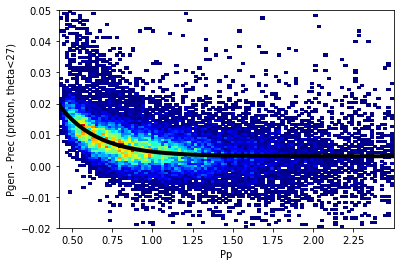

[ 3.03207393e-03  9.41744208e-02 -4.15760569e+00]


In [104]:
dvpi01 = dvpi0[dvpi0["Ptheta"]<27]
dvpi01 = dvpi01[dvpi01["Pp"]<2.5]
dvpi01 = dvpi01[dvpi01["MCPp"]-dvpi01["Pp"]<0.1]
dvpi01 = dvpi01[dvpi01["MCPp"]-dvpi01["Pp"]>-0.025]
# dvpi01 = dvpi01[np.abs(dvpi01["MCPp"]-dvpi01["Pp"]-correction(res_lsq, dvpi01["Pp"]))<0.01]
plt.hist2d(dvpi01["Pp"], dvpi01["MCPp"]-dvpi01["Pp"], cmin=1, cmap=cmap, bins =[101, np.linspace(-0.02, 0.05, 101)])
plt.plot(np.linspace(0.4, 4, 101), correction(res_lsq, np.linspace(0.4, 4, 101)), color='k', linewidth=4)
plt.xlabel("Pp")
plt.ylabel("Pgen - Prec (proton, theta<27)")
plt.show()
print(res_lsq.x)

In [97]:
def fun(x, t, y):
    return x[0] + x[1]*np.exp(x[2]*t) - y
x0 = np.ones(3)
x0[2] = -1
res_lsq = least_squares(fun, x0, args=(dvpi01["Pp"], dvpi01["MCPp"]-dvpi01["Pp"]))

In [77]:
# dvpi0_corrected = epg.getDVpi0(correction=True)
dvpi0_corrected = epg.getDVpi0(correction=False)
df_MC = pi0MCdnpInb["df_MC"]
gam1 = df_MC[df_MC.index%2==0]
gam1 = gam1.reset_index(drop=True)
gam2 = df_MC[df_MC.index%2==1]
gam2 = gam2.reset_index(drop=True)
gam1.loc[:,"MCGpx2"] = gam2.loc[:,"MCGpx"]
gam1.loc[:,"MCGpy2"] = gam2.loc[:,"MCGpy"]
gam1.loc[:,"MCGpz2"] = gam2.loc[:,"MCGpz"]
gam1.loc[:,"MCGe2"] = gam2.loc[:,"MCGe"]
df_MC = gam1
dvpi0_corrected = pd.merge(dvpi0_corrected, df_MC, how="inner", on="event")
dvpi0copy = copy(dvpi0_corrected)
dvpi0copy.loc[:, "MCGe"] = np.where(dvpi0_corrected["MCGe"]>dvpi0_corrected["MCGe2"], dvpi0_corrected.loc[:, "MCGe"], dvpi0_corrected.loc[:, "MCGe2"])
dvpi0copy.loc[:, "MCGe2"] = np.where(dvpi0_corrected["MCGe"]>dvpi0_corrected["MCGe2"], dvpi0_corrected.loc[:, "MCGe2"], dvpi0_corrected.loc[:, "MCGe"])
dvpi0_corrected = dvpi0copy
dvpi0_corrected["Pp"] = mag([dvpi0_corrected["Ppx"], dvpi0_corrected["Ppy"], dvpi0_corrected["Ppz"]])
dvpi0_corrected["MCPp"] = mag([dvpi0_corrected["MCPpx"], dvpi0_corrected["MCPpy"], dvpi0_corrected["MCPpz"]])
dvpi0_corrected1 = dvpi0_corrected[dvpi0_corrected["Ptheta"]<27]
dvpi0_corrected2 = dvpi0_corrected[(dvpi0_corrected["Ptheta"]>=27)]

In [ ]:
plt.hist2d(dvpi0_corrected1["Pp"], dvpi0_corrected1["Pp"]-dvpi0_corrected1["MCPp"], cmin=1, cmap=cmap, bins =[np.linspace(0.4, 5, 101), np.linspace(-0.1, 0.1, 101)])
plt.show()

In [ ]:
# dvpi0 = pi0MCdnpInb["dvpi0"]
# dvpi0.loc[:,"Pp"] = mag([dvpi0["Ppx"], dvpi0["Ppy"], dvpi0["Ppz"]])
plt.hist2d(dvpi0_corrected.Pp, dvpi0_corrected.MM2_ep, bins =[np.linspace(0.4, 4, 101), np.linspace(-0.1, 0.25, 101)], cmin =1, cmap=cmap)
# plt.hist2d(pi0MCdnpInb["dvpi0"].Pp, pi0MCdnpInb["dvpi0"].MM2_ep, bins =[np.linspace(0.4, 4, 101), np.linspace(-0.25, 0.25, 101)], cmin =1, cmap=cmap)
plt.show()

## 2. Data, before correction

In [6]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/pi0_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=False)
dvcs = epg.getDVCS(sub2g=False)
pi0ExpInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [12]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/dvcs_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=False)
dvcs = epg.getDVCS(correction=False, sub2g=True)
dvcsExpInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

## 3. Data, after correction

In [7]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/pi0_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(sub2g=True, correction = False)
pi0ExpInbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [8]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/dvcs_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
dvcsExpInbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [9]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/pi0_outb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(sub2g=True, correction = False)
pi0ExpOutbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [10]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/dvcs_outb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
dvcsExpOutbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

## 4 Simulation, after correction

In [7]:
#pi0 from Andrey, inb, rec
fname = "~/Dropbox (MIT)/data/MC/dnp/pi0DNPInbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
pi0MCdnpInbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_ep": epg.df_ep, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC":epg.df_MC}

In [12]:
#pi0 from Andrey, inb, rec
fname = "~/Dropbox (MIT)/data/MC/dnp/pi0DNPOutbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
pi0MCdnpOutbCorrected = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_ep": epg.df_ep, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC":epg.df_MC}

In [8]:
#dvcs from simulation, vz correct, vxvy (0.05, 0.1), rec
fname = "~/Dropbox (MIT)/data/MC/nonradVxyzCorrInbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
dvcsMCVxyzCorrInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

In [14]:
#dvcs from simulation, vz correct, vxvy (0.05, 0.1), rec
fname = "~/Dropbox (MIT)/data/MC/nonradVxyzCorrOutbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
dvcsMCVxyzCorrOutb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

## 5. Comparing before and after proton momentum correction for data

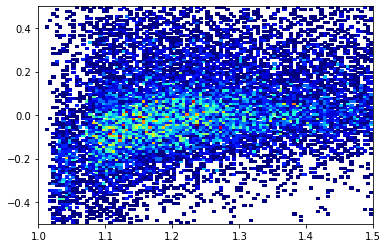

In [202]:
# dvcs = dvcsExpInbCorrected["dvcs"]
dvcs2 = dvcsExpInb["dvcs"]
# dvcs2 = dvcs2[dvcs2["Ptheta"]>27]
dvcs2 = dvcs2[dvcs2["Gstat"]>2000]
dvcs2 = dvcs2[dvcs2["Psector"]==6]
# plt.hist2d(dvcs2.xB, dvcs2.Ge, bins = [np.linspace(0, 1, 101), np.linspace(1.05, 10 ,101)], cmin = 1, cmap = cmap)
# plt.hist2d(dvcs2.Ptheta, dvcs2.Pe, bins = [np.linspace(0,45, 101), np.linspace(1,1.5, 101)], cmin = 1, cmap = cmap)
plt.hist2d(dvcs2.Pe, dvcs2.MM2_ep, bins = [np.linspace(1,1.5, 101), np.linspace(-0.5, 0.5, 101)], cmin = 1, cmap = cmap)
# print(dvcs2.Ee.mean())
plt.show()

5.799601252312706


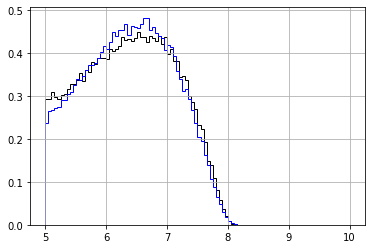

In [172]:
dvpi02 = pi0ExpInb["dvpi0"]
# plt.hist2d(dvpi02.xB, dvpi02.ME_epgg, bins = [np.linspace(0, 1, 101), np.linspace(1.05, 10 ,101)], cmin = 1, cmap = cmap)
# plt.hist2d(dvpi02.Pe, dvpi02.ME_epgg, bins = [np.linspace(1.05, 2, 101), np.linspace(-0.5, 1.2 ,101)], cmin = 1, cmap = cmap)
dvcs2.Ee.hist(bins=np.linspace(5, 10, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
dvpi02.Ee.hist(bins=np.linspace(5, 10, 101), density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
print(dvpi02.Ee.mean())
plt.show()

5.799601252312706


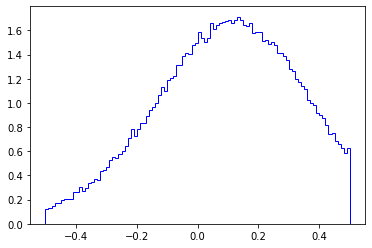

In [168]:
dvpi0 = pi0ExpInbCorrected["dvpi0"]
# plt.hist2d(dvpi0.Ge, dvpi0.Mpi0, bins = [np.linspace(1, 10, 101), np.linspace(0.1, 0.17 ,101)], cmin = 1, cmap = cmap)
plt.hist(dvpi0.ME_epgg, bins = np.linspace(-0.5, 0.5 ,101), density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
plt.show()

In [46]:
len(dvpi0Indvpi0Sim), len(alldvcsIndvpi0Sim), len(onlydvcsIndvpi0Sim)

(55972, 40121, 23906)

In [133]:
dvpi0Indvpi0Sim = pi0MCdnpInbCorrected["dvpi0"]
alldvcsIndvpi0Sim = pi0MCdnpInbCorrected["dvcs"]
onlydvcsIndvpi0Sim = alldvcsIndvpi0Sim[~alldvcsIndvpi0Sim["event"].isin(dvpi0Indvpi0Sim["event"])]
alldvcsIndata = dvcsExpInbCorrected["dvcs"]
onlydvcsIndata = alldvcsIndata[~alldvcsIndata["event"].isin(dvcsExpInbCorrected["dvpi0"]["event"])]
onlydvcsIndata = onlydvcsIndata[onlydvcsIndata["t2"]<2]
dvpi0Indata = pi0ExpInbCorrected["dvpi0"]
print(len(onlydvcsIndata["event"].unique()), len(dvpi0Indata["event"].unique()), len(dvpi0Indata["event"].unique())* len(onlydvcsIndvpi0Sim["event"].unique())/len(dvpi0Indvpi0Sim["event"].unique()))
cont_inb = len(dvpi0Indata["event"].unique())* len(onlydvcsIndvpi0Sim["event"].unique())/len(dvpi0Indvpi0Sim["event"].unique())/len(onlydvcsIndata["event"].unique())
print("the number of dvcs candidates in inbending: ", len(onlydvcsIndata["event"].unique()) - len(dvpi0Indata["event"].unique())* len(onlydvcsIndvpi0Sim["event"].unique())/len(dvpi0Indvpi0Sim["event"].unique()))

114546 133612 57906.60754169688
the number of dvcs candidates in inbending:  56639.39245830312


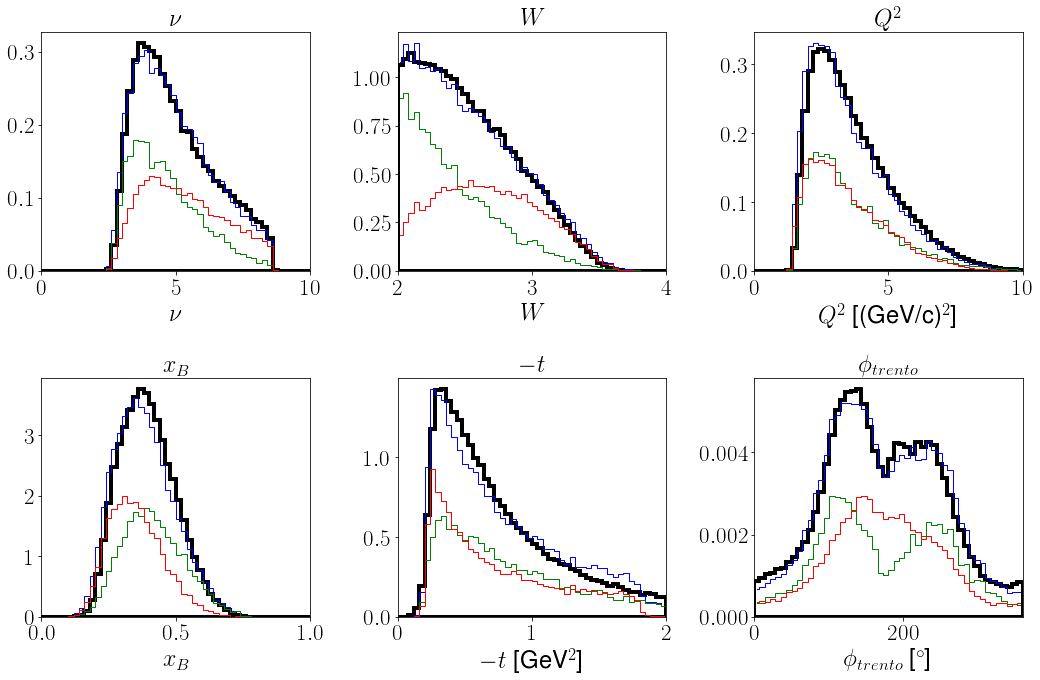

<Figure size 432x288 with 0 Axes>

In [134]:
dvpi0IndvcsSim = dvcsMCVxyzCorrInb["dvpi0"]
alldvcsIndvcsSim = dvcsMCVxyzCorrInb["dvcs"]
onlydvcsIndvcsSim = alldvcsIndvcsSim[~alldvcsIndvcsSim["event"].isin(dvpi0IndvcsSim["event"])]

onlydvcsIndata = onlydvcsIndata[onlydvcsIndata["t2"]<2]

varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [None, None, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [0, 2, 0, 0, 0, 0, 0 , 0]
binends = [10, 4, 10, 1, 2, 360, 4, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
	for yind in range(0, 2):
		ind =xind+3*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 51)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0Sim[varstoplot[ind]], bins, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSim[varstoplot[ind]], bins, density = True)
		simDist = cont_inb*simDist_dvpi0 + (1-cont_inb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
		axs[yind, xind].bar(bincenters, simDist, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].step(bincenters, cont_inb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs[yind, xind].bar(bincenters, cont_inb*simDist_dvpi0, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].step(bincenters, (1-cont_inb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs[yind, xind].bar(bincenters, (1-cont_inb)*simDist_dvcs, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].hist(onlydvcsIndata[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_2.pdf")
plt.clf()

In [135]:
dvpi0IndvcsSim = dvcsMCVxyzCorrInb["dvpi0"]
alldvcsIndvcsSim = dvcsMCVxyzCorrInb["dvcs"]
onlydvcsIndvcsSim = alldvcsIndvcsSim[~alldvcsIndvcsSim["event"].isin(dvpi0IndvcsSim["event"])]


varstoplot = ["phi2"]
title = [r"$\phi_{{trento}}$" ]
unit = [degree]
binstarts = [0]
binends = [360]
fig, axs = plt.subplots(1, 1, figsize = (8, 5))
for xind in range(0,1):
	for yind in range(0, 1):
		ind = 0 #xind+3*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 31)
		bins2 = np.linspace(start-12, end+12, 33)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0Sim[varstoplot[ind]], bins2, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSim[varstoplot[ind]], bins2, density = True)
		simDist = cont_inb*simDist_dvpi0 + (1-cont_inb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs.step(bincenters, 12*114546*simDist, where='mid',color='b', linewidth=1)
		axs.step(bincenters, 12*114546*cont_inb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs.step(bincenters, 12*114546*(1-cont_inb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs.hist(onlydvcsIndata[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs.set_title("Raw yields, Inbending")
		axs.set_xlim([start, end])
		axs.set_xticks(np.linspace(0,360,13))
		axs.set_yticks(np.linspace(0,10000,6))
		if (unit[ind]):
			axs.set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs.set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
plt.savefig("inbBkg.pdf")
plt.clf()

<Figure size 576x360 with 0 Axes>

In [125]:
dvpi0Indvpi0Sim = pi0MCdnpOutbCorrected["dvpi0"]
alldvcsIndvpi0Sim = pi0MCdnpOutbCorrected["dvcs"]
onlydvcsIndvpi0Sim = alldvcsIndvpi0Sim[~alldvcsIndvpi0Sim["event"].isin(dvpi0Indvpi0Sim["event"])]
alldvcsIndata = dvcsExpOutbCorrected["dvcs"]
onlydvcsIndata = alldvcsIndata[~alldvcsIndata["event"].isin(dvcsExpOutbCorrected["dvpi0"]["event"])]
dvpi0Indata = pi0ExpOutbCorrected["dvpi0"]
print(len(onlydvcsIndata["event"].unique()), len(dvpi0Indata["event"].unique()), len(dvpi0Indata["event"].unique())* len(onlydvcsIndvpi0Sim["event"].unique())/len(dvpi0Indvpi0Sim["event"].unique()))
cont_outb = len(dvpi0Indata["event"].unique())* len(onlydvcsIndvpi0Sim["event"].unique())/len(dvpi0Indvpi0Sim["event"].unique())/len(onlydvcsIndata["event"].unique())
print("the number of dvcs candidates in Outbending: ", len(onlydvcsIndata["event"].unique()) - len(dvpi0Indata["event"].unique())* len(onlydvcsIndvpi0Sim["event"].unique())/len(dvpi0Indvpi0Sim["event"].unique()))

140744 153093 74115.82610936694
the number of dvcs candidates in Outbending:  66628.17389063306


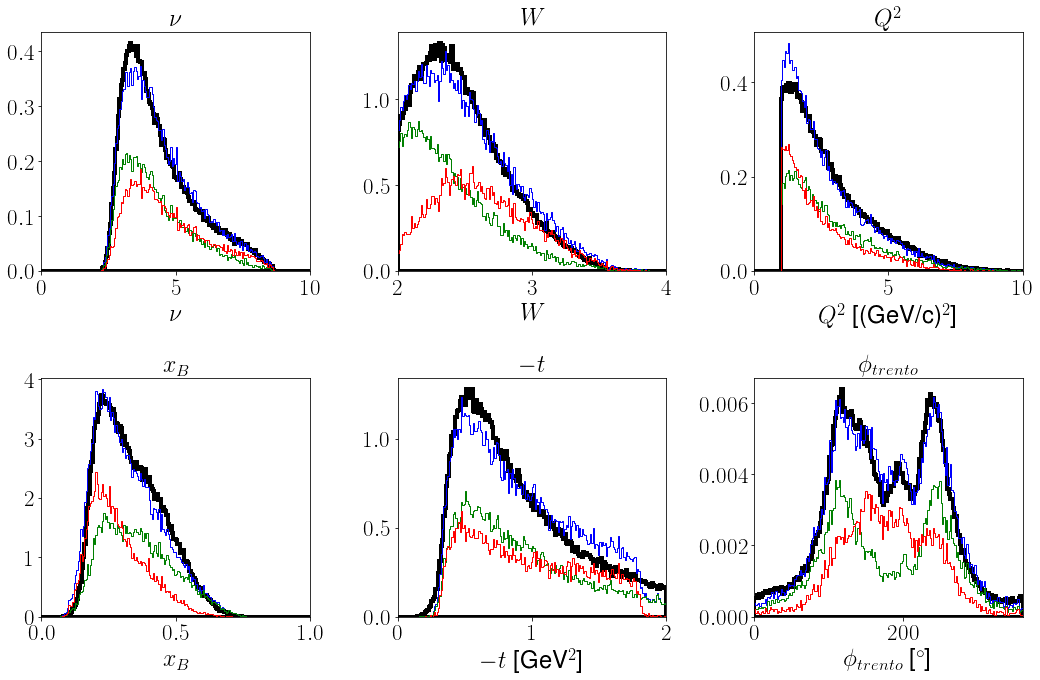

<Figure size 432x288 with 0 Axes>

In [126]:
dvpi0IndvcsSim = dvcsMCVxyzCorrOutb["dvpi0"]
alldvcsIndvcsSim = dvcsMCVxyzCorrOutb["dvcs"]
onlydvcsIndvcsSim = alldvcsIndvcsSim[~alldvcsIndvcsSim["event"].isin(dvpi0IndvcsSim["event"])]

onlydvcsIndata = onlydvcsIndata[onlydvcsIndata["t2"]<2]

varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [None, None, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [0, 2, 0, 0, 0, 0, 0 , 0]
binends = [10, 4, 10, 1, 2, 360, 4, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
	for yind in range(0, 2):
		ind =xind+3*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 201)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0Sim[varstoplot[ind]], bins, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSim[varstoplot[ind]], bins, density = True)
		simDist = cont_outb*simDist_dvpi0 + (1-cont_outb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
		axs[yind, xind].bar(bincenters, simDist, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].step(bincenters, cont_outb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs[yind, xind].bar(bincenters, cont_outb*simDist_dvpi0, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].step(bincenters, (1-cont_outb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs[yind, xind].bar(bincenters, (1-cont_outb)*simDist_dvcs, width=np.diff(bins), color = 'w', facecolor='w')
		axs[yind, xind].hist(onlydvcsIndata[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_2.pdf")
plt.clf()

In [132]:
dvpi0IndvcsSim = dvcsMCVxyzCorrInb["dvpi0"]
alldvcsIndvcsSim = dvcsMCVxyzCorrInb["dvcs"]
onlydvcsIndvcsSim = alldvcsIndvcsSim[~alldvcsIndvcsSim["event"].isin(dvpi0IndvcsSim["event"])]

onlydvcsIndata = onlydvcsIndata[onlydvcsIndata["t2"]<2]

varstoplot = ["phi2"]
title = [r"$\phi_{trento}$" ]
unit = [degree]
binstarts = [0]
binends = [360]
fig, axs = plt.subplots(1, 1, figsize = (8, 5))
for xind in range(0,1):
	for yind in range(0, 1):
		ind = 0 #xind+3*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 31)
		bins2 = np.linspace(start-12, end+12, 33)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0Sim[varstoplot[ind]], bins2, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSim[varstoplot[ind]], bins2, density = True)
		simDist = cont_inb*simDist_dvpi0 + (1-cont_inb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs.step(bincenters, 140744*12*simDist, where='mid',color='b', linewidth=1)
		axs.step(bincenters, 140744*12*cont_outb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs.step(bincenters, 140744*12*(1-cont_outb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs.hist(onlydvcsIndata[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs.set_title("Raw yields, outbending")
		axs.set_xlim([start, end])
		axs.set_xticks(np.linspace(0,360,13))
		axs.set_yticks(np.linspace(0,10000,6))
		if (unit[ind]):
			axs.set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs.set_xlabel(title[ind])
plt.tight_layout()
# plt.show()
plt.savefig("outbBkg.pdf")
plt.clf()

<Figure size 576x360 with 0 Axes>

In [26]:
len(onlydvcsIndata[onlydvcsIndata["Pe"]>np.sqrt(1.2**2+0.938**2)]), len(dvpi0Indata[dvpi0Indata["Pe"]>np.sqrt(1.2**2+0.938**2)])

(35212, 44959)

In [52]:
len(onlydvcsIndata["event"].unique), len(dvpi0Indata["event"].unique), len(dvpi0Indata["event"].unique)* len(onlydvcsIndvpi0Sim)/len(dvpi0Indvpi0Sim)

(127176, 135453, 57852.84460087187)

In [106]:
print("the number of dvcs candidates in inbending: ", len(onlydvcsIndata) - len(dvpi0Indata)* len(onlydvcsIndvpi0Sim)/len(dvpi0Indvpi0Sim))

the number of dvcs candidates in inbending:  69323.15539912813


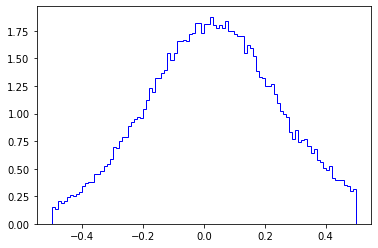

In [133]:
dvpi0 = dvpi0Indvpi0Sim
# plt.hist2d(dvpi0.Ge, dvpi0.ME_epgg, bins = [np.linspace(1, 10, 101), np.linspace(-0.5, 0.5 ,101)], cmin = 1, cmap = cmap)
plt.hist(dvpi0.ME_epgg, bins = np.linspace(-0.5, 0.5 ,101), density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
plt.show()

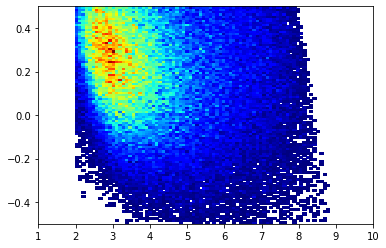

In [118]:
dvcs = onlydvcsIndata
plt.hist2d(dvcs.Ge, dvcs.ME_epg, bins = [np.linspace(1, 10, 101), np.linspace(-0.5, 0.5 ,101)], cmin = 1, cmap = cmap)
# plt.hist(dvpi0.ME_epgg, bins = np.linspace(-0.5, 0.5 ,101), density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
plt.show()

In [ ]:
dvpi0 = pi0ExpInb["dvpi0"]
dvpi0.loc[:,"Pp"] = mag([dvpi0["Ppx"], dvpi0["Ppy"], dvpi0["Ppz"]])

In [ ]:
dvpi02 = dvpi0[(dvpi0["Ptheta"]>=27) & (dvpi0["Psector"]==5)]
VmissPi0 = [-dvpi02["Epx"] - dvpi02["Ppx"], -dvpi02["Epy"] -
            dvpi02["Ppy"], pbeam - dvpi02["Epz"] - dvpi02["Ppz"]]
dvpi02.loc[:, 'MM2_ep'] = (-M - ebeam + dvpi02.loc[:,"Ee"] + dvpi02.loc[:,"Pe"])**2 - mag2(VmissPi0)
plt.hist2d(dvpi02.Pe, dvpi02.MM2_ep, bins = [np.linspace(1, 2, 101), np.linspace(-0.7, 0.7, 101)], cmin = 1, cmap = cmap)
plt.show()

In [ ]:
dvpi01 = dvpi0[(dvpi0["Ptheta"]<27) & (dvpi0["Psector"]==1)]
plt.hist2d(dvpi01.Pe, dvpi01.MM2_ep, bins = [np.linspace(1, 2, 101), np.linspace(-0.7, 0.7, 101)], cmin = 1, cmap = cmap)
plt.show()

In [ ]:
dvpi0 = dvpi0_corrected
dvpi02 = dvpi0[(dvpi0["Ptheta"]>=27)]
VmissPi0 = [-dvpi02["Epx"] - dvpi02["Ppx"], -dvpi02["Epy"] -
            dvpi02["Ppy"], pbeam - dvpi02["Epz"] - dvpi02["Ppz"]]
dvpi02.loc[:, 'MM2_ep'] = (-M - ebeam + dvpi02.loc[:,"Ee"] + dvpi02.loc[:,"Pe"])**2 - mag2(VmissPi0)
plt.hist2d(dvpi02.Pe, dvpi02.MM2_ep, bins = [np.linspace(1, 2, 101), np.linspace(-0.7, 0.7, 101)], cmin = 1, cmap = cmap)
plt.show()

In [ ]:
dvpi01 = dvpi0[(dvpi0["Ptheta"]<27)]
plt.hist2d(dvpi01.ME_epgg, dvpi01.MM2_ep, bins = [101, np.linspace(-0.7, 0.7, 101)], cmin = 1, cmap = cmap)
plt.show()

In [ ]:
# dvpi0.MM2_egg.hist(bins=101, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
# dvpi0_corrected.MM2_egg.hist(bins=101, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
plt.hist2d(dvpi0_corrected.Ge, dvpi0_corrected.ME_epgg, bins = [np.linspace(2, 5, 101), np.linspace(-0.5, 0.5 ,101)], cmin = 1, cmap = cmap)
plt.show()

In [ ]:
len(dvcsExpInb["dvcs"])

In [ ]:
# dvpi0_corr = epg.getDVpi0(correction=True)
# dvcs_corr = epg.getDVCS(correction=True, sub2g=True)
dvcs2 = dvcs[dvcs["Ptheta"]>27]
plt.hist2d(dvcs2.Pe, dvcs2.MM2_eg, bins = [101, 101], cmin = 1, cmap = cmap)
plt.show()

In [ ]:
plt.hist2d(dvcs_corr.Ge, dvcs_corr.MM2_eg, bins = [101, 101], cmin = 1, cmap = cmap)
plt.show()

In [ ]:
plt.hist2d(dvpi0_corrected.Ge+dvpi0_corrected.Ge2, dvpi0_corrected.MM2_egg, bins = [101, 101], cmin = 1, cmap = cmap)
plt.show()

In [ ]:
VmissG = [-dvcs_corr["Epx"] - dvcs_corr["Ppx"], -dvcs_corr["Epy"] - dvcs_corr["Ppy"],
          pbeam - dvcs_corr["Epz"] - dvcs_corr["Ppz"]]
gam = [dvcs_corr["Gpx"], dvcs_corr["Gpy"], dvcs_corr["Gpz"]]

In [ ]:
# (getTheta(gam)-getTheta(VmissG)).hist(bins=101)
# plt.hist2d(getTheta(gam), getTheta(gam)-getTheta(VmissG), bins =101)
plt.show()

In [ ]:
(getPhi(gam)-getPhi(VmissG)).hist(bins=np.linspace(-3, 3, 101))

In [ ]:
(mag(gam)-mag(VmissG)).hist(bins=np.linspace(-3, 3, 101))

In [ ]:
plt.hist2d(mag(gam), mag(VmissG)-mag(gam), bins =101, cmin = 1, cmap = cmap)
plt.show()

In [ ]:
VmissG = [-dvcs_corr["Epx"] - dvcs_corr["Ppx"], -dvcs_corr["Epy"] - dvcs_corr["Ppy"],
          pbeam - dvcs_corr["Epz"] - dvcs_corr["Ppz"]]
gam = [dvcs_corr["Gpx"], dvcs_corr["Gpy"], dvcs_corr["Gpz"]]
plt.hist2d(mag(gam), dvcs_corr["ME_epg"] + (mag(gam)-mag(VmissG)), bins =101, cmin = 1, cmap = cmap)
# plt.hist(dvcs_corr["ME_epg"]-(mag(gam)-mag(VmissG)))
plt.show()

In [ ]:
VmissG = [-dvcsExpInb["dvcs"]["Epx"] - dvcsExpInb["dvcs"]["Ppx"], -dvcsExpInb["dvcs"]["Epy"] - dvcsExpInb["dvcs"]["Ppy"],
          pbeam - dvcsExpInb["dvcs"]["Epz"] - dvcsExpInb["dvcs"]["Ppz"]]
gam = [dvcsExpInb["dvcs"]["Gpx"], dvcsExpInb["dvcs"]["Gpy"], dvcsExpInb["dvcs"]["Gpz"]]
# plt.hist2d(mag(gam), dvcsExpInb["dvcs"]["ME_epg"]-(mag(gam)-mag(VmissG)), bins =101, cmin = 1, cmap = cmap)
# plt.hist(dvcsExpInb["dvcs"]["ME_epg"]-(mag(gam)-mag(VmissG)))
plt.hist2d(getTheta(gam), getTheta(gam)-getTheta(VmissG), bins =101)
plt.show()